**Name: Anil Bhusal  <br>
Csc 447  <br>
HomeWork 3  <br>
Prof. Erik K. Grimmelmann<br>
12 October 2022**  <br>

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Import the Iris data set

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_min, x_max = X.min() - 0.5, X.max() + 1.5


### Get Iris classifications

In [3]:
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
    


0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


### Setup Iris feature lablels

In [4]:
IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])
    
#setting for plots
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Function to choose the classes and features to be modeled and return XX and YY arrays

In [5]:
"""
This function will take list of class and lsit of features. 
list of class can be size of two or three classes
list of features can be one to four features
Finally, this function will model the class and feature. And, return array of XX and YY arrays.
where, XX array will include the specified features from the original dataset.
       YY array will include the specified classes from the original dataset.
"""
def build_XX_YY_from_class_and_feature(classes: list, features: list):
    # choose the classes and features to be included in the model
    cdx = np.array(classes)             # this array contains the classes to be considered (can be 2-3 classes)
    fdx = np.array(features)           # this array contains the features to be considered (can be 1-4 features)

    nC = len(cdx)
    nF = len(fdx)


    print ('\nClasses')
    for i in range(nC):
        print (cdx[i],IrisC[cdx[i]])

    print ('\nFeatures')
    for i in range(nF):
        print (fdx[i],IrisF[fdx[i]])


    # build the XX and YY arrays
    # these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

    i = 0
    numY = 0
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1

    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    return XX,YY;

### Fit the model

In [6]:
"""
This function will train the model  Stochastic Gradient Descent classifier and print the accuracy  from the 
model data set. After fitting the data, it will return the object. 
"""
def fit_model(XX, YY, model=SGDClassifier,tol=1e-4, random_state=0, loss=None, kernel=None):
    if not kernel and not loss:
        clf = model(tol=tol, random_state=random_state)
    elif not kernel:
        clf = model(tol=tol, random_state=random_state, loss=loss)
    else:
        clf = model(tol=tol, random_state=random_state, kernel=kernel)
    clf.fit(XX,YY)
    print('\nAccuracy of the model is',clf.score(XX,YY)*100,'%')
    return clf;

### Plot data for this pair of features and classes

In [7]:
"""
Function to draw the graph of each combinations except 4D graphs. 
"""
def plot_feature_classes(XX, YY, cdx: list, fdx: list, clf):
    plt.close('all')
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2

    if (len(fdx) == 1):

        fig, ax = plt.subplots(figsize=(8,2))

        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)

        xxzeros1 = (0. * xx) + .5

    # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (len(fdx) == 2):

        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

    # plot the decision regions    

        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

    # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.set_ylabel(IrisF[fdx[1]])
        ax.legend(loc='upper right', fontsize='small')
        plt.show()    

    elif (len(fdx) == 3):

        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show() 

    # if there are two classes, add the decision boundary and plot again

        A = clf.fit(XX,YY)
        Acl =  A.classes_
        if (len(Acl) == 2):  

            fig = plt.figure(figsize=(6,6))    
            ax = plt.axes(projection='3d')   

        # plot the data points

            if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
                color=pltC[0], marker=pltM[0], label=IrisC[0])
            if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
                color=pltC[1], marker=pltM[1], label=IrisC[1])
            if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
                color=pltC[2], marker=pltM[2], label=IrisC[2])    


            Ai = A.intercept_
            Acoef = A.coef_
            xgrid = np.arange(x_min,x_max,0.05)       
            nx = len(xgrid)
            for i in range(nx):
                for j in range(nx):
                    z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                    if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

            ax.set_xlim(x_min,x_max)
            ax.set_ylim(x_min,x_max)
            ax.set_zlim(x_min,x_max)
            ax.set_xlabel(xF)
            ax.set_ylabel(yF)
            ax.set_zlabel(zF)            
            ax.legend(loc='upper right', fontsize='small')
            plt.show()         


### Combination of classes

In [8]:
#list of all the combination of the three classes
three_classes = [[0,1,2]]              # Choosing 3 classes

### Combination of features

In [9]:
#list of all the combination of the two features
two_feature= [[0,1], [0,2], [0,3],[1,2], [1,3], [2,3]]        # Choosing 2 features

### Stochastic gradient descent using the modified-Huber loss function

Case: 1
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of the model is 72.0 %


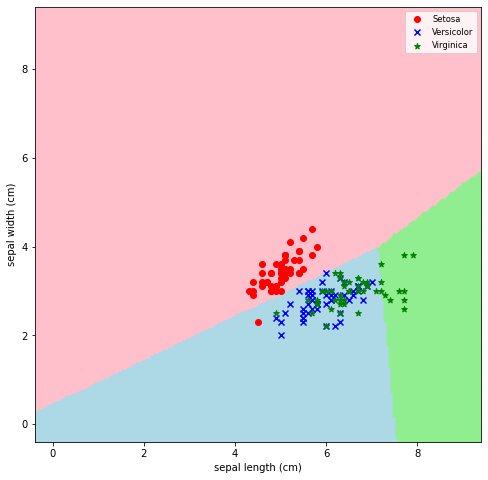

---------------------------------------------------------------------------------------------------- 

Case: 2
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of the model is 70.66666666666667 %


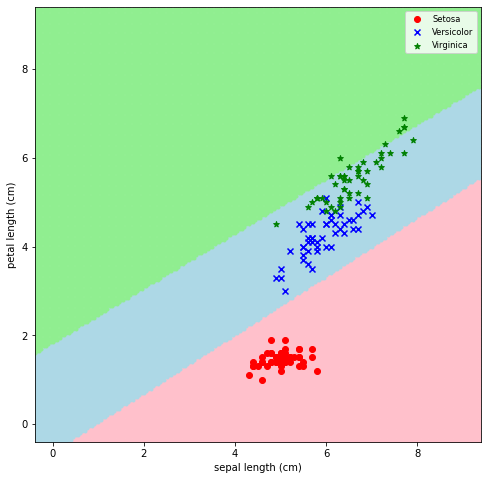

---------------------------------------------------------------------------------------------------- 

Case: 3
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of the model is 72.66666666666667 %


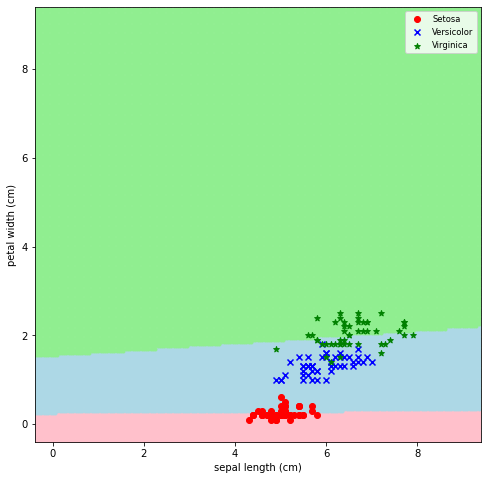

---------------------------------------------------------------------------------------------------- 

Case: 4
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of the model is 70.0 %


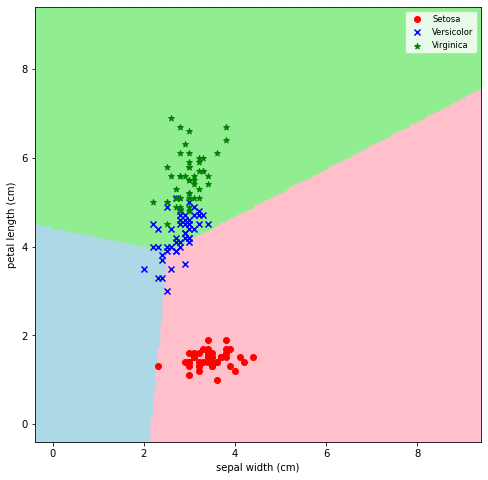

---------------------------------------------------------------------------------------------------- 

Case: 5
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of the model is 95.33333333333334 %


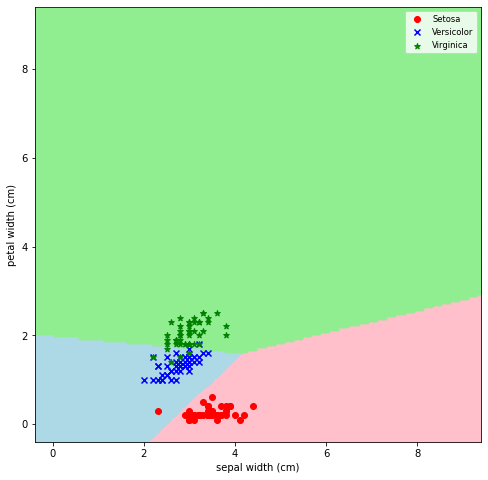

---------------------------------------------------------------------------------------------------- 

Case: 6
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of the model is 88.0 %


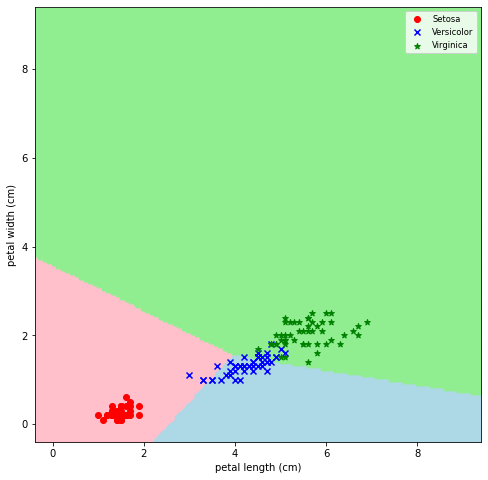

---------------------------------------------------------------------------------------------------- 



In [10]:
total_cases = 1
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY, tol=1e-4, random_state=0, model=SGDClassifier, loss='modified_huber')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')
        

### Logistic regression

Case: 7
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of the model is 82.0 %


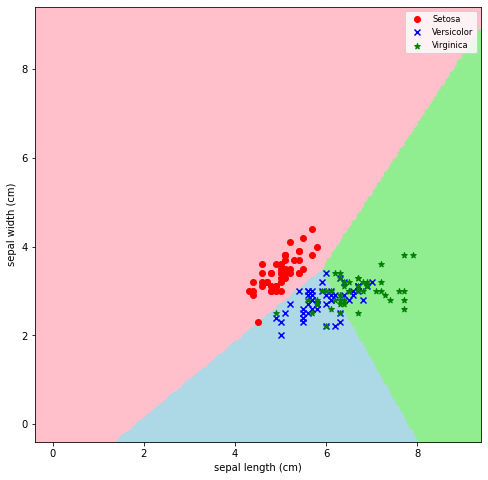

---------------------------------------------------------------------------------------------------- 

Case: 8
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of the model is 96.0 %


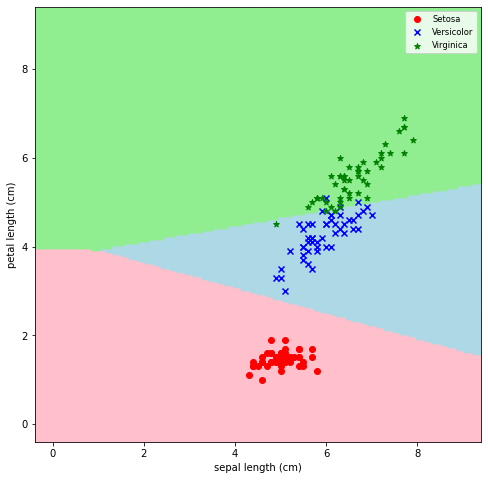

---------------------------------------------------------------------------------------------------- 

Case: 9
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


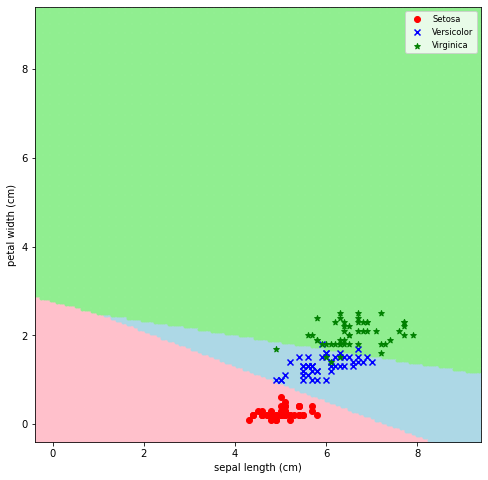

---------------------------------------------------------------------------------------------------- 

Case: 10
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of the model is 95.33333333333334 %


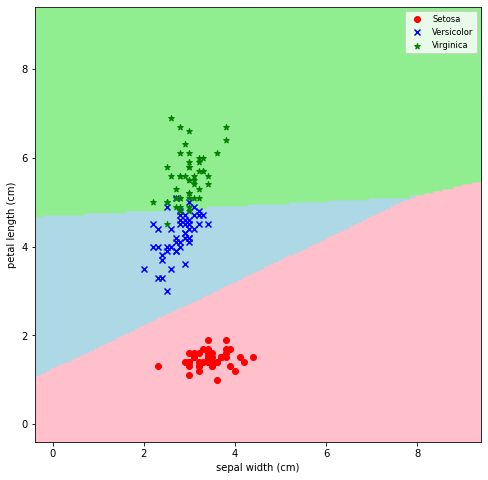

---------------------------------------------------------------------------------------------------- 

Case: 11
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


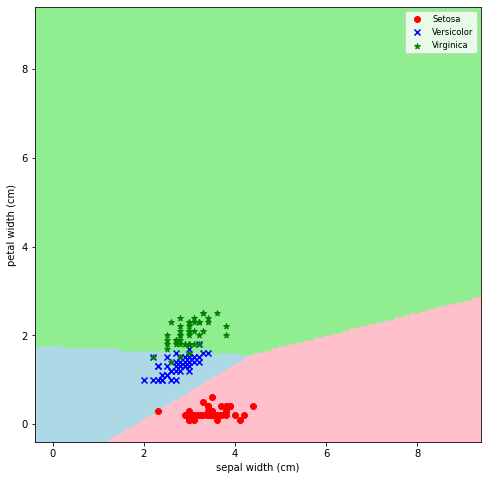

---------------------------------------------------------------------------------------------------- 

Case: 12
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of the model is 96.66666666666667 %


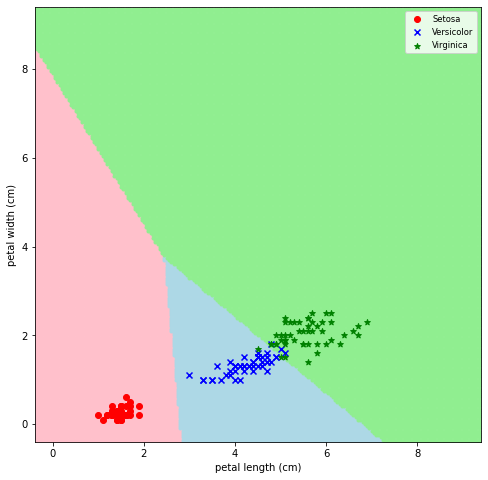

---------------------------------------------------------------------------------------------------- 



In [11]:
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY,tol=1e-4, random_state=0, model=LogisticRegression)
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Support vector machine with Linear kernel

Case: 13
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of the model is 82.0 %


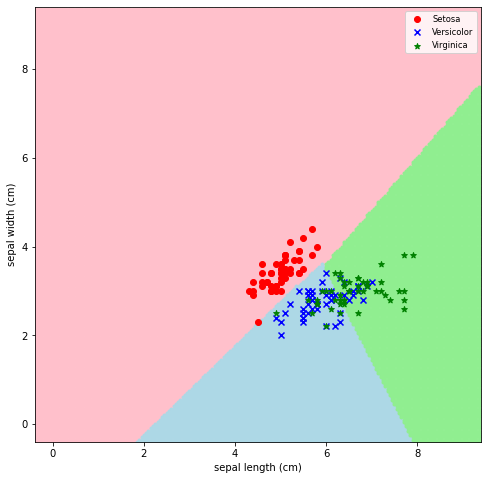

---------------------------------------------------------------------------------------------------- 

Case: 14
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of the model is 95.33333333333334 %


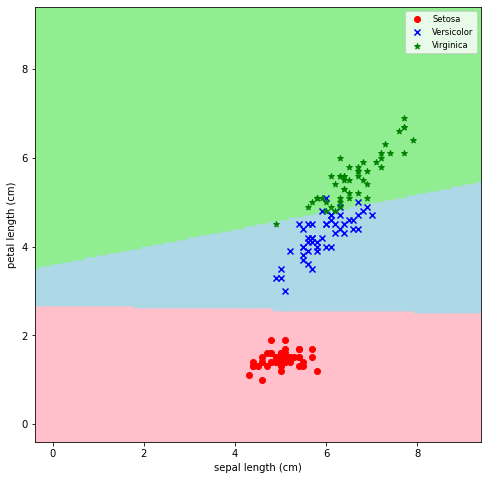

---------------------------------------------------------------------------------------------------- 

Case: 15
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


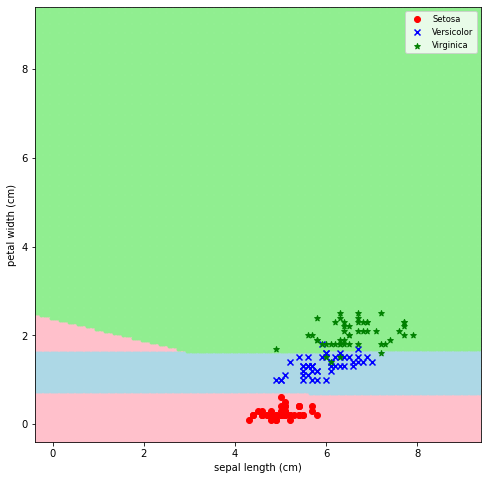

---------------------------------------------------------------------------------------------------- 

Case: 16
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of the model is 96.0 %


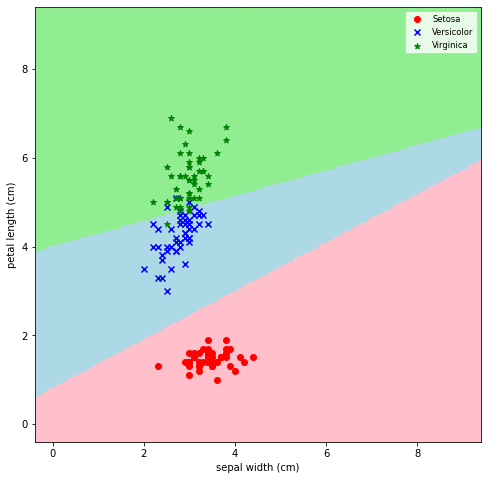

---------------------------------------------------------------------------------------------------- 

Case: 17
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


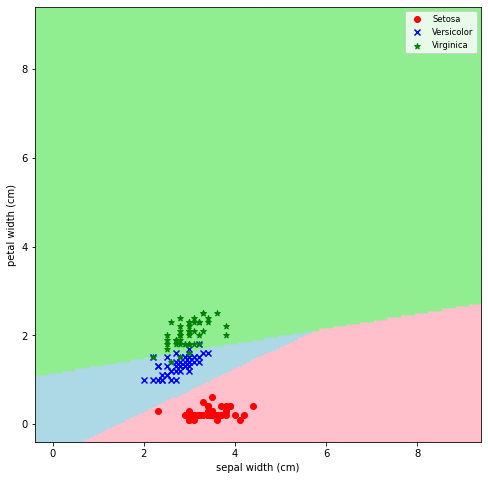

---------------------------------------------------------------------------------------------------- 

Case: 18
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of the model is 96.66666666666667 %


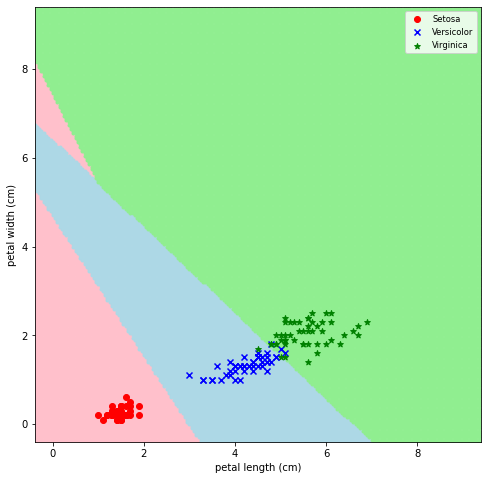

---------------------------------------------------------------------------------------------------- 



In [12]:
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY,tol=1e-4, random_state=0,  model=SVC, kernel='linear')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Support vector machine with Polynomial kernel

Case: 19
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of the model is 81.33333333333333 %


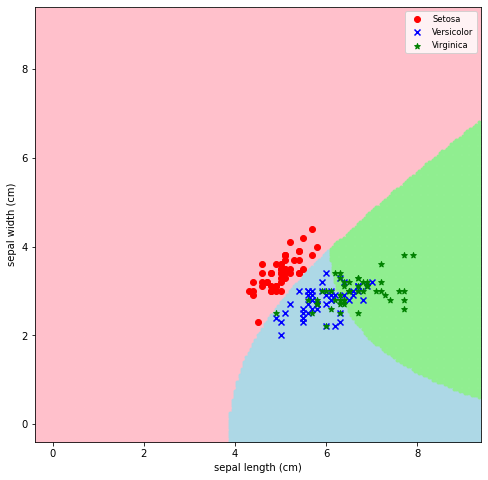

---------------------------------------------------------------------------------------------------- 

Case: 20
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of the model is 96.0 %


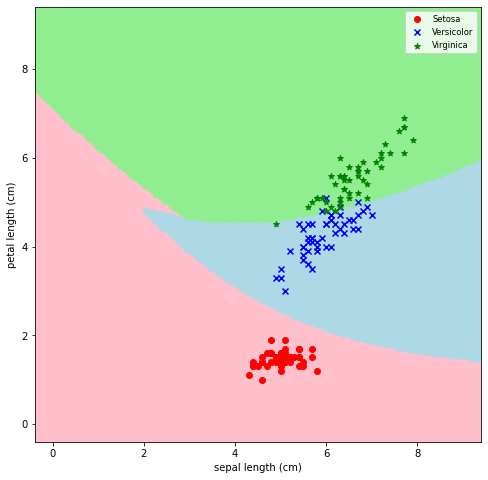

---------------------------------------------------------------------------------------------------- 

Case: 21
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of the model is 95.33333333333334 %


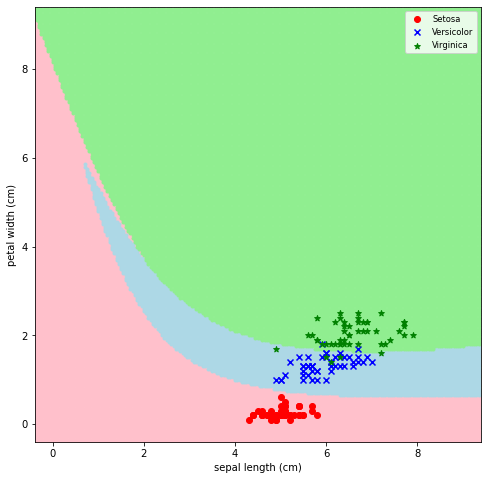

---------------------------------------------------------------------------------------------------- 

Case: 22
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of the model is 95.33333333333334 %


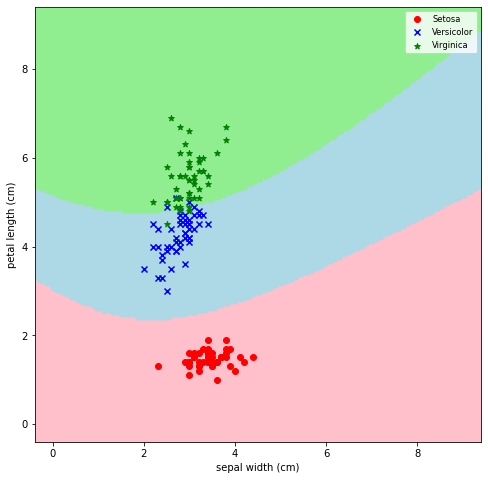

---------------------------------------------------------------------------------------------------- 

Case: 23
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


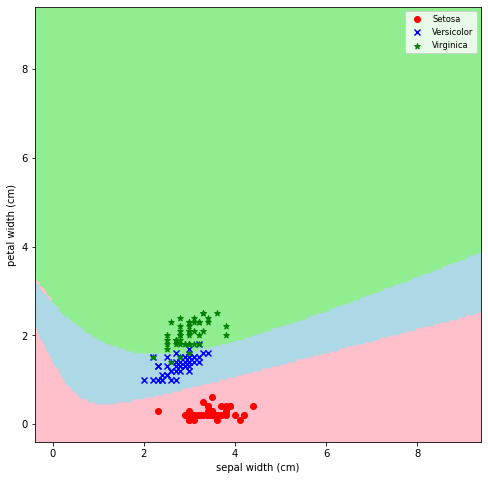

---------------------------------------------------------------------------------------------------- 

Case: 24
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of the model is 96.66666666666667 %


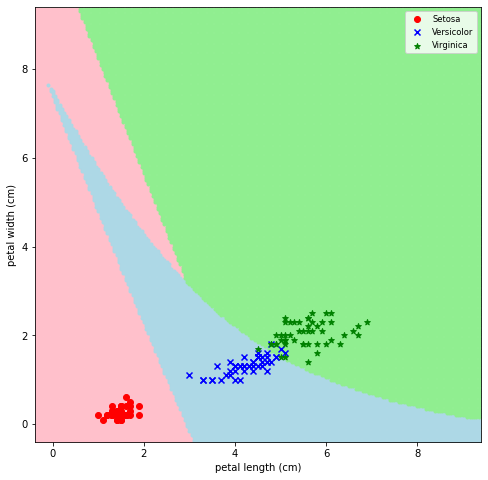

---------------------------------------------------------------------------------------------------- 



In [13]:
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY,tol=1e-4, random_state=0,  model=SVC, kernel='poly')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

### Support vector machine with RBF kernel

Case: 25
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy of the model is 82.0 %


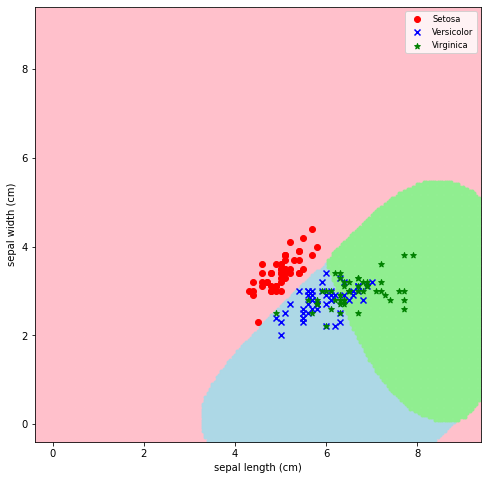

---------------------------------------------------------------------------------------------------- 

Case: 26
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy of the model is 96.0 %


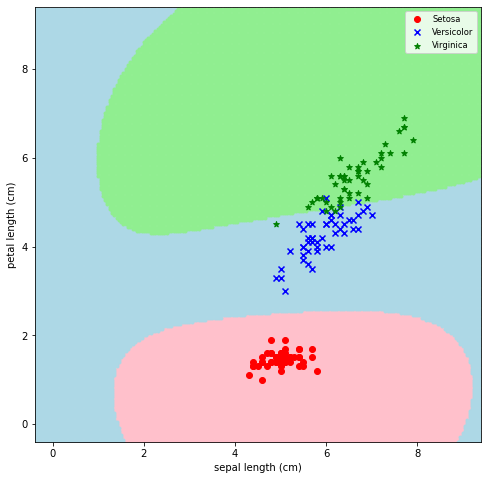

---------------------------------------------------------------------------------------------------- 

Case: 27
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


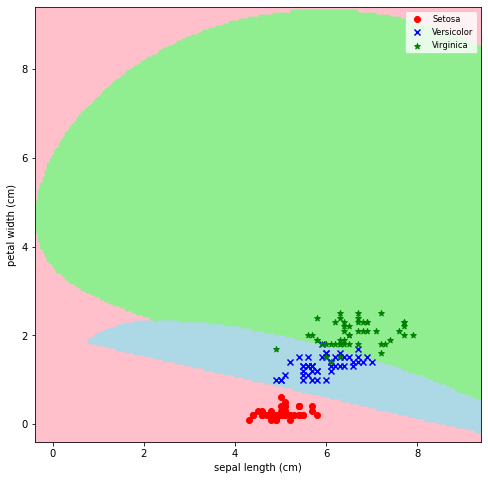

---------------------------------------------------------------------------------------------------- 

Case: 28
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy of the model is 95.33333333333334 %


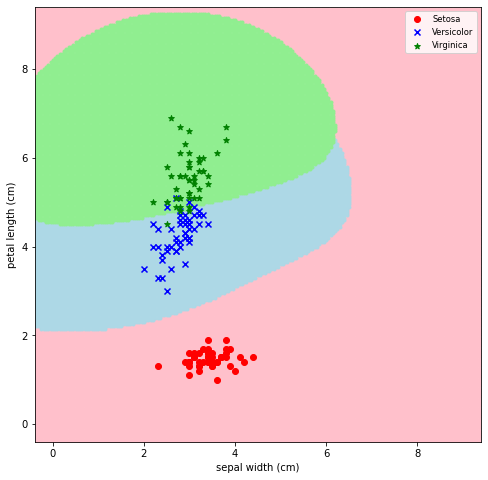

---------------------------------------------------------------------------------------------------- 

Case: 29
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy of the model is 96.0 %


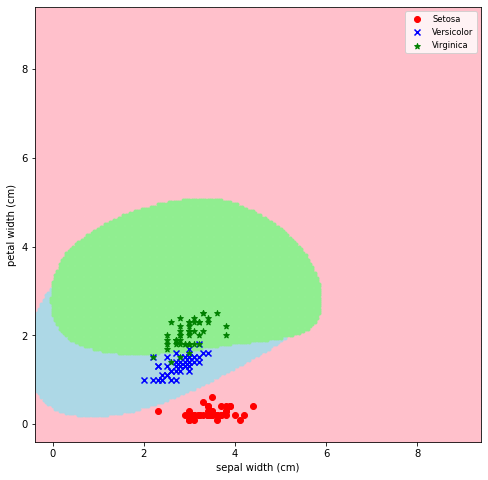

---------------------------------------------------------------------------------------------------- 

Case: 30
--------

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy of the model is 95.33333333333334 %


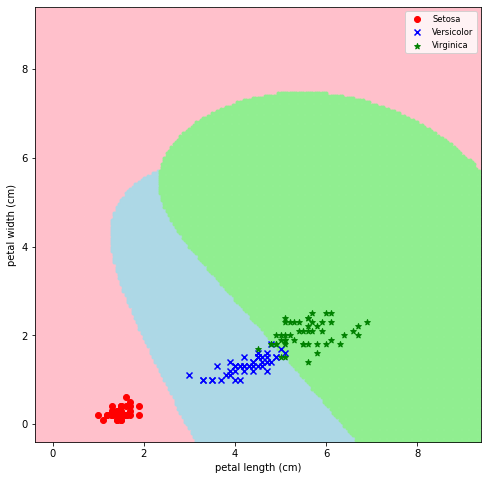

---------------------------------------------------------------------------------------------------- 



In [14]:
for classes in three_classes:
    for feature in two_feature:
        print('Case:', total_cases)
        print('--------')
        XX,YY = build_XX_YY_from_class_and_feature(classes,feature)
        clf = fit_model(XX, YY,tol=1e-4, random_state=0,  model=SVC, kernel='rbf')
        plot_feature_classes(XX, YY, cdx=classes, fdx=feature, clf=clf)
        total_cases +=1
        print('-'*100, '\n')

## <center> Observation/Discussion </center> 

Classes/Features | Sepal Length & Sepal Width | Sepal Length & Petal Length  | Sepal Length & Petal Width | Sepal Width & Petal Length  | Sepal Width & Petal Width | Petal Length & Petal Width 
----|------|--------|-------|-------------|------------|--------------- 
SGDClassifier|72|70.67  |72.67|70   |95.34|88
LogisticRegression|82|96   |96   |95.34|96|96.67
SVC (Linear)|82|95.34|96   |96   |96|96.67 
SVC (Polynomial)|81.33|96|95.34|95.34|96|96.67  
SVC (RBF)|82|96|96|95.34|96|95.34


From above accuracy table, we found out that the accuracy of SGD Classifier is different than that of other four model. The accuracy of rest four model, LogisticRegression, SVC (Linear), SVC (Polynomial), and SVC (RBF)	 are almost same for all the combination. The lowest accuracy is with Sepal length and petal length of SGD Classifier. At the same model, The accuracy with Sepal Width and Petal width is almost similar with rest of the model presented above. Hence, the accuracy of LogisticRegression, SVC (Linear), SVC (Polynomial), and SVC (RBF) have same accracy level and SGDClassifier has different and lower accuracy than of rest of the model. In Addition, comparing the accuries with our last assignment using default loss function Hinge loss, we got lower accuries using modified_huber loss.  


## <center> The End </center> 